In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scan
import simulate_data
from tqdm import tqdm

In [42]:
def get_imgs(N, pattern_template):
    if len(pattern_template) == 0:
        print('FAIL')
        return pattern_template, None
    
    win_size = (N,1+max([max(k[:,0]) for k in pattern_template]))
    pattern_img = np.zeros((len(pattern_template),*win_size))
    for p,pattern in enumerate(pattern_template):
        for (i,j) in pattern:
            pattern_img[p,j,i] = 1
            
    pattern_img = pattern_img.transpose((1,2,0))
    
    return pattern_template, pattern_img

# h2 hippocampus

In [2]:
def get_data(clusters_file, spikes_file):
#     labels_file = open(labels_file)
    clusters = clusters_file.readlines()
    num_clu = int(clusters[0][:-1])-2
#     num_clu = clusters[0][:-1]
    clusters = np.array([k[:-1] for k in clusters],dtype='int')[1:]
#     labels = np.array([k[:-1] for k in labels])
    
    spikes = spikes_file.readlines()
    spikes = np.array([k[:-1] for k in spikes],dtype='float')
    
    spikes = spikes[clusters>1]
    clusters = clusters[clusters>1]
    
    spikes, clusters = spikes[spikes.argsort()], clusters[spikes.argsort()] # sorting the arrays by spike time
    
    
    return clusters, spikes, num_clu


In [5]:
file =r'C:\Users\miles\Projects\datasets\crcns\hc2\ec013.527\ec013.527.clu.1'
os.path.abspath('C:\\Users\\miles\\Projects\\datasets')

'C:\\Users\\miles\\Projects\\datasets'

In [33]:
shanks = 4
fs=20
D=100 # window size
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\hc2\\ec013.527\\ec013.527.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)
spikes = [k/fs for k in spikes] # Gives us spikes in milliseconds

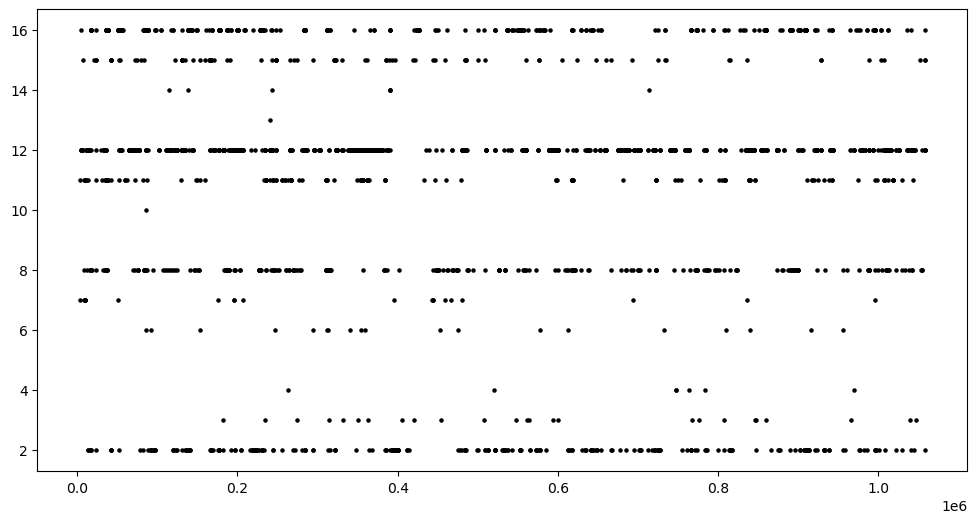

In [34]:
fig, ax = plt.subplot_mosaic('A',figsize=(12,6))
axs = 'ABCD'
i=0
ax[axs[i]].scatter(spikes[i],clusters[i], c='black',s=5)
plt.show()

In [35]:
len(spikes[i]) # total spikes

2833

In [38]:
pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster(spikes[i],clusters[i],window_dim=D)

2833 Windows


33 patterns found...... 97% 10.01 | opt_cutoff - 0.01 | most_detections - 53tections - 5333


In [49]:
pattern_template_copy, pattern_img = get_imgs(1+max(clusters[i].astype('int')),pattern_template)

times,units = spikes[i], clusters[i]

raster = np.zeros((max((times).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]),units[i]-1]=1
print('done')

(1058348, 17) (17, 119, 33)
done


In [52]:
D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

  9%|███████▌                                                                           | 3/33 [00:42<07:08, 14.29s/it]C:\Users\miles\AppData\Local\Temp\ipykernel_17980\1507848206.py:6: RuntimeWarning: invalid value encountered in divide
  sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])
100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [07:59<00:00, 14.53s/it]


In [54]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template[patterns[counts>=3]]])

(array([ 0,  1,  2,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26,
        29], dtype=int64),
 array([461,  50,  50,  56,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   6]),
 array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]))

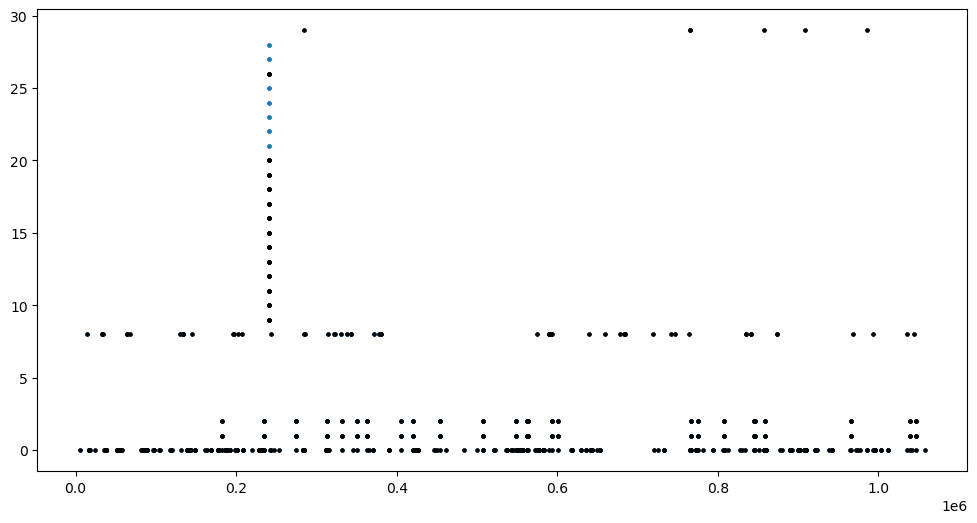

In [57]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5)
y,x = patterns[counts>=3][np.where(sanity_check[:,patterns[counts>=3]]==1)[1]], np.where(sanity_check[:,patterns[counts>=3]]==1)[0]
plt.scatter(x,y, c='black',s=5)
plt.show()

In [83]:
# Testing the next shank...

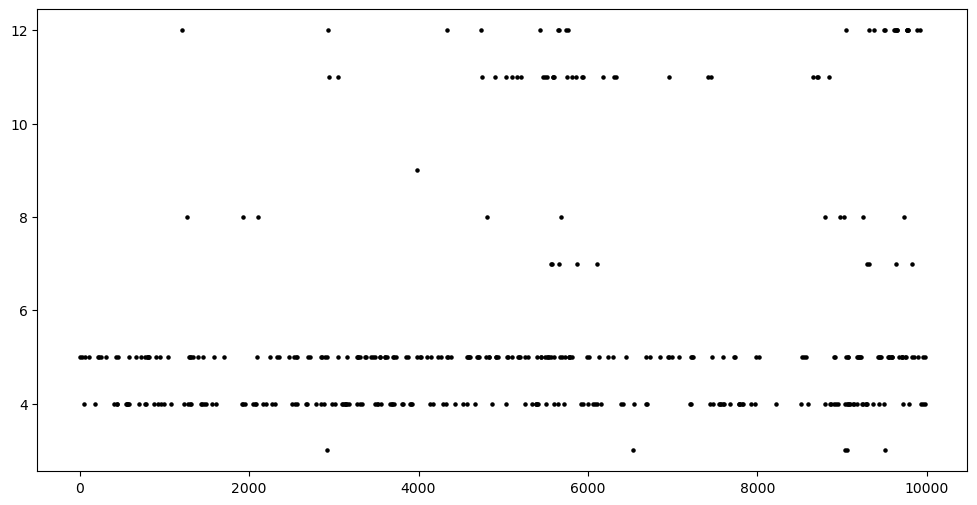

In [94]:
plt.figure(figsize=(12,6))
axs = 'ABCD'
i=2
plt.scatter(spikes[i][spikes[i]<10000],clusters[i][spikes[i]<10000], color='black',s=5)
plt.show()

In [89]:
len(spikes[i]) # total spikes

44912

In [95]:
pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster(spikes[i],clusters[i],window_dim=D)

44910 Windows


KeyboardInterrupt: 

In [96]:
# Let's try a different rat

In [106]:
clusters, spikes, num_clu = [],[],[]

for i in range(shanks):
    (clusters_file, spikes_file) = (
        open(f"C:\\Users\\miles\\Projects\\datasets\\crcns\\hc2\\ec014.793\\ec014.793.clu.{i+1}"),
        open(f"C:\\Users\miles\\Projects\\datasets\\crcns\\hc2\\ec014.793\\ec014.793.res.{i+1}")
    )
    a,b,c = get_data(clusters_file, spikes_file)
    clusters.append(a)
    spikes.append(b)
    num_clu.append(c)

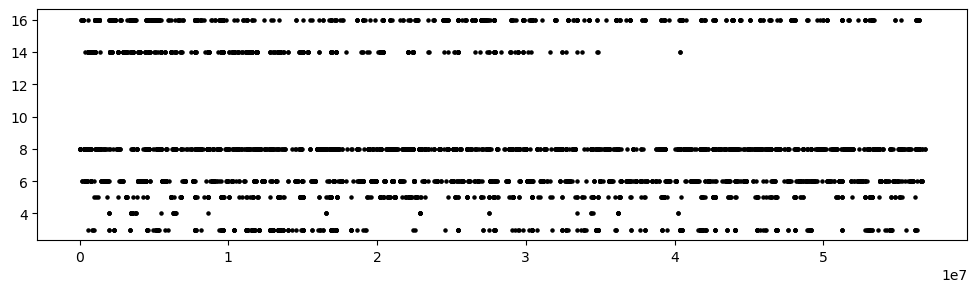

In [112]:
plt.figure(figsize=(12,3))
# axs = 'ABCD'
i=3
plt.scatter(spikes[i],clusters[i], c='black',s=5)
plt.show()

In [113]:
len(spikes[i])

7314

In [114]:
pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster(spikes[i],clusters[i],window_dim=D)

7314 Windows


8 patterns found...s... 88% 10.01 | opt_cutoff - 2.0199999999999996 | most_detections - 13tections - 13


In [115]:
pattern_template_copy, pattern_img = get_imgs(1+max(clusters[i].astype('int')),pattern_template)

times,units = spikes[i], clusters[i]

raster = np.zeros((max((times).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]),units[i]-1]=1
print('done')

(56850941, 17) (17, 96, 8)
done


In [ ]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template[patterns[counts>=3]]])

In [116]:
D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

  0%|                                                                                            | 0/8 [00:05<?, ?it/s]


KeyboardInterrupt: 

In [118]:
pattern_template # yikes ahahah :(

[array([[ 0,  3],
        [85,  3]]),
 array([[ 0,  8],
        [95,  8]]),
 array([[ 0,  8],
        [76,  8]]),
 array([[ 0,  8],
        [83,  8]]),
 array([[ 0,  8],
        [79,  8]]),
 array([[ 0,  8],
        [78,  8]]),
 array([[ 0,  8],
        [77,  8]]),
 array([[ 0, 14],
        [85, 14]])]

# Prefrontal cortex 

In [149]:
import scipy.io
import pandas as pd
test = scipy.io.loadmat(r'C:\Users\miles\Projects\datasets\crcns\fcx-1\Dino_061914_ACC\Dino_061914_ACC_SAll.mat')
df = pd.DataFrame(test['S_CellFormat'])
data = test['S_CellFormat'][0]
num_units = data.shape[0]
spikes = ([])
labels = ([])
for i in range(num_units):
    spikes = np.hstack((spikes,data[i].squeeze()))
    labels = np.hstack((labels,i*np.ones_like(data[i].squeeze())))
spikes, labels = spikes[spikes.argsort()], labels[spikes.argsort()] # sorting the arrays by spike time
print(spikes.shape,labels.shape)

(1153309,) (1153309,)


In [150]:
spikes.shape # 1.1 million spikes?

(1153309,)

In [151]:
spikes = (spikes*1000).astype('int')

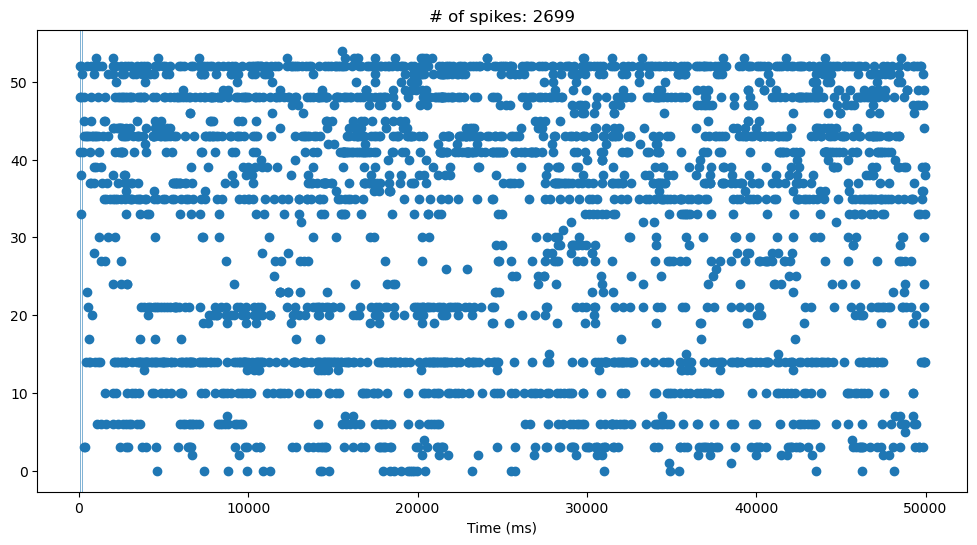

In [156]:
plt.figure(figsize=(12,6))
start, stop = 0, 50 * 1000 # The first 100 seconds 
D = 100
cut = (spikes > start ) & (spikes < stop)
labels = labels.astype('int')
plt.scatter(spikes[cut],labels[cut])
plt.axvline(100,linewidth=0.4)
plt.axvline(100+D,linewidth=0.4)
plt.xlabel('Time (ms)')
plt.title('# of spikes: ' + str(len(spikes[cut])))
plt.show()

In [157]:
pattern_template, sublist_keys_filt, window_time, cluster_time, sequence_time = scan.scan_raster(spikes[cut],labels[cut],window_dim=D)

2699 Windows


6 patterns found...s... 83% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


In [158]:
pattern_template

[array([[ 0, 21],
        [69, 14]]),
 array([[ 0, 48],
        [19,  6],
        [23, 43]]),
 array([[ 0, 43],
        [44, 48],
        [61, 10]]),
 array([[ 0, 29],
        [40, 10],
        [68, 14]]),
 array([[ 0, 37],
        [33, 37],
        [99, 43]]),
 array([[ 0, 37],
        [11, 52]])]

In [161]:
pattern_template_copy, pattern_img = get_imgs(1+max(labels),pattern_template)

times,units = spikes[cut], labels[cut]

raster = np.zeros((max((times).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]),units[i]-1]=1
print('done')

(49977, 55) (55, 100, 6)
done


In [162]:
D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.max(sanity_check[:,j])

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.23s/it]


In [164]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns[counts>=3]), np.array(counts[counts>=3]), np.array([len(k) for k in pattern_template[patterns[counts>=3]]])

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([  3,  99,  93,  39, 128,  64]),
 array([2, 3, 3, 3, 3, 2]))

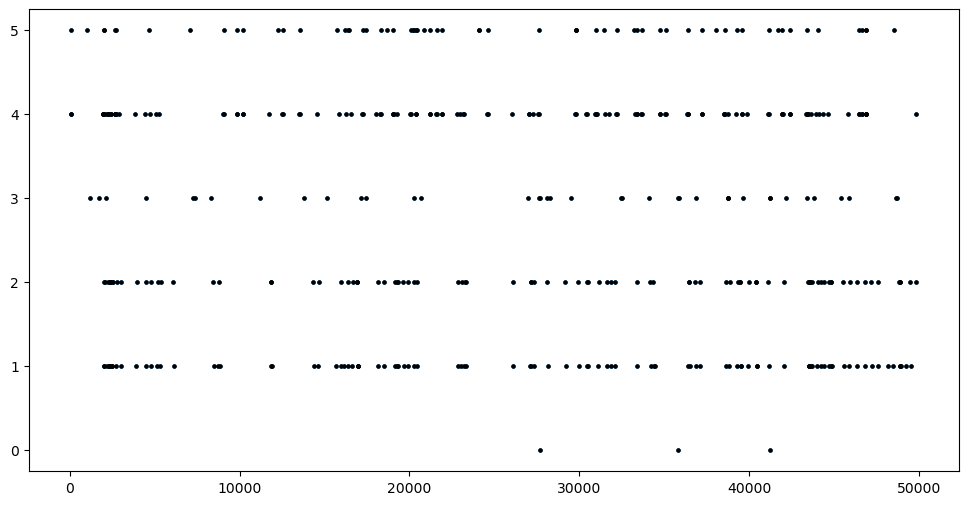

In [165]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5)
y,x = patterns[counts>=3][np.where(sanity_check[:,patterns[counts>=3]]==1)[1]], np.where(sanity_check[:,patterns[counts>=3]]==1)[0]
plt.scatter(x,y, c='black',s=5)
plt.show()

In [169]:
for k in pattern_template:
    print(*k.T)
    print('')

[ 0 69] [21 14]

[ 0 19 23] [48  6 43]

[ 0 44 61] [43 48 10]

[ 0 40 68] [29 10 14]

[ 0 33 99] [37 37 43]

[ 0 11] [37 52]



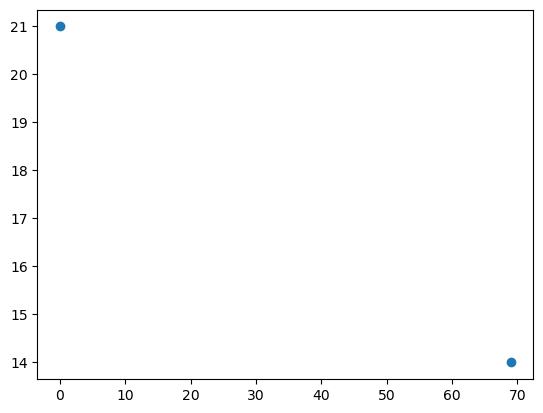

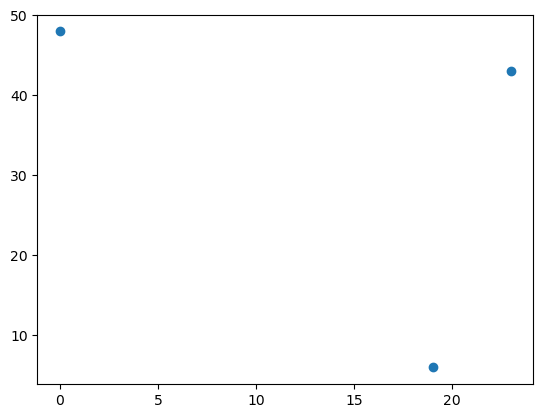

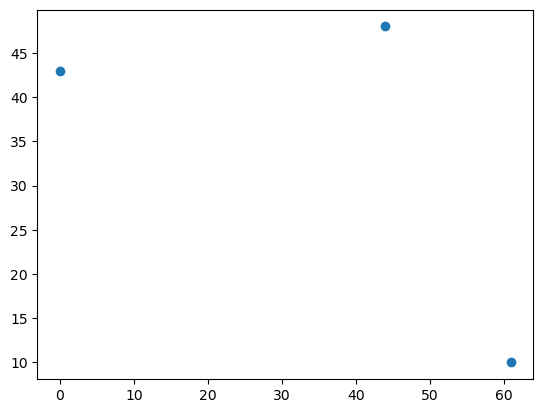

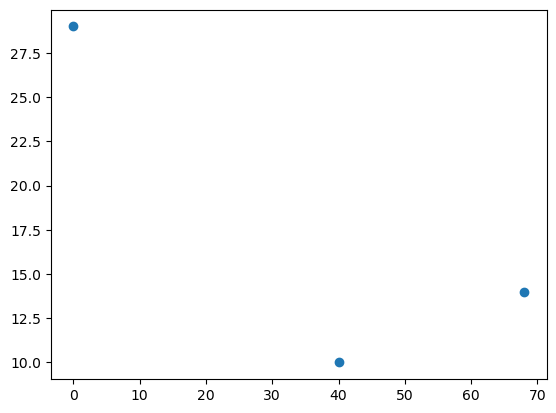

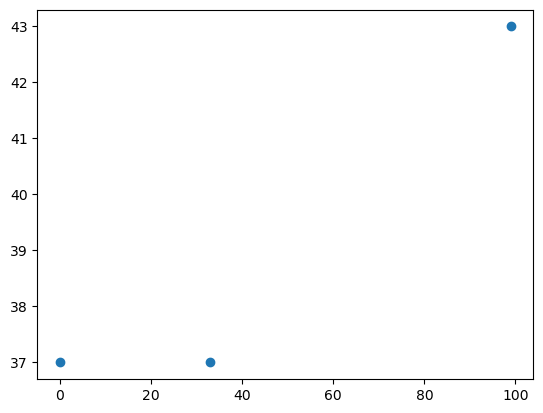

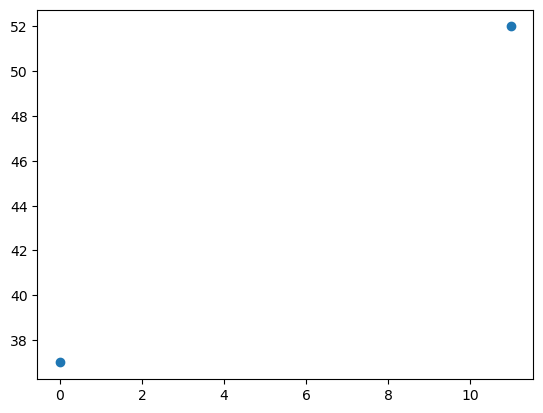

In [173]:
for k in pattern_template:
    plt.figure()
    plt.scatter(k.T[0],k.T[1])
    plt.show()